## If a cell begins with DNC: do not change it and leave the markdown there so I can expect a basic level of  organization that is common to all HW (will help me with grading). This also clearly delineates the sections for me

## DNC: preamble leave any general comments here and, in keeping with good practice, I suggest you load all needed modules in the preamble

## DNC: Begin Part 1: Descriptive Statistics 

In [168]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy 
import scipy.stats
import math
import scipy.interpolate

%matplotlib inline

### Part 1: Problems for descriptive statistics 

#### 1-1: Understanding statistical calculations in python 

* Create a numpy array that has 10 uniform random numbers between 25.0 and 35.0, store it as a variable 
* Createa pandas dataframe with one frame based on your numpy array 
* Use "np.std" and "pd.std" formulas to calculate the standard deviation from both arrays, do not change any of the default arguments 
* The numbers should be different, explain why 
* Repeat the exercise with 1E6 uniform random numbers drawn from the same range 
* Comment on whether the numbers are different or not and explain why 
* Demonstrate that by using the proper function arguments you can obtain the same answer in both methods 


In [11]:
dat = np.random.rand(10)*10 + 25
df = pd.DataFrame(dat)
print(np.std(df))
print(df.std())

0    2.674363
dtype: float64
0    2.819026
dtype: float64


> Pandas uses the denominator as N-1, while Numpy does not. If setting ddof=1 to the numpy function, they become the same. Now we can confirm it as below. 

In [14]:
dat = np.random.rand(10)*10 + 25
df = pd.DataFrame(dat)
print(np.std(df, ddof=1))
print(df.std())

0    3.37936
dtype: float64
0    3.37936
dtype: float64


> Let's try for 1E6 numbers instead of 10 numbers. 

In [13]:
dat = np.random.rand(10**6)*10 + 25
df = pd.DataFrame(dat)
print(np.std(df))
print(df.std())

0    2.889479
dtype: float64
0    2.88948
dtype: float64


> As the number increases, the result from `numpy.std` converges to the value of unbiased estimator, the result of `pandas.std`. This is because the **law of large numbers (LLN)**, the average of the results from a large number of trials would be close to the expected value. 

In [38]:
dat = np.random.rand(10**6)*10 + 25
df = pd.DataFrame(dat)
print(np.std(df))
print(df.std())

0    2.886902
dtype: float64
0    2.886903
dtype: float64
0    2.886903
dtype: float64


> Now manually we can verify the result as below using the unbiased estimator `N-1` for the square root of the variance. 

In [40]:
np.sqrt(((df - df.mean())**2).sum()/(10**6-1))

0    2.886903
dtype: float64


#### 1-2: Box plots 

* The data file GerberdingElectricityChilledWater.csv shows chilled water (energy) and electricity usage for Gerberding Hall over approximately an 18 month period from Jan 2013 to June 2014.  
* **Note: these are real data! If you make any executive decisions (e.g., remove some points for very specific reasons), clearly explain your decision and motivation for doing so** 

* Load the data into Python (your choice of method) and prepare a box plot summary of the data. 
* Present the plot in the nicest possible format (e.g., improve it from the default and prepare it for publication or presentation format) - this is open ended and you can use your judgement 
* Explain in your own words what each part on the box plot means

In [44]:
d1 = pd.read_csv('GerberdingElectricityChilledWater.csv')
d1.head()

,DateTime,Btu,kWh
0,1/1/13 0:15,49664.0,19.69
1,1/1/13 0:30,90112.0,20.84
2,1/1/13 0:45,19968.0,17.42
3,1/1/13 1:00,50176.0,19.59
4,1/1/13 1:15,99840.0,20.46


,Btu,kWh
count,4.999800e+04,49998.000000
mean,6.142801e+04,18.673828
std,3.378179e+04,14.736762
min,0.000000e+00,-71.682969
25%,3.993600e+04,15.900000
50%,5.017600e+04,18.080000
75%,7.987200e+04,26.117500
max,2.070016e+06,51.010000


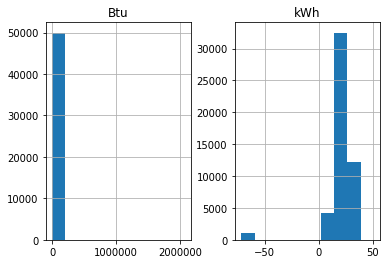

In [47]:
d1.hist()
d1.describe()

> Now we can see there are some outliers which don't make sense in the real world (e.g., energy consumption couldn't be negative unless otherwise it generates electricity). Let's remove those outliers from the data. 

,Btu,kWh
count,42966.000000,42966.000000
mean,52496.660828,19.975075
std,21737.208541,5.984937
min,0.000000,0.000000
25%,39936.000000,15.810000
50%,50176.000000,17.780000
75%,69632.000000,23.147500
max,99840.000000,51.010000


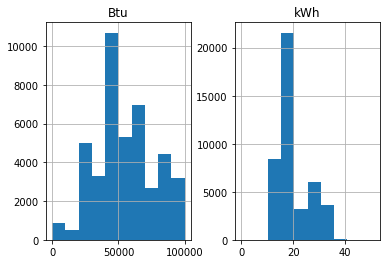

In [57]:
d1 = d1[d1['kWh'] >= 0]
d1 = d1[d1['Btu'] < 10**5]
d1.hist()
d1.describe()

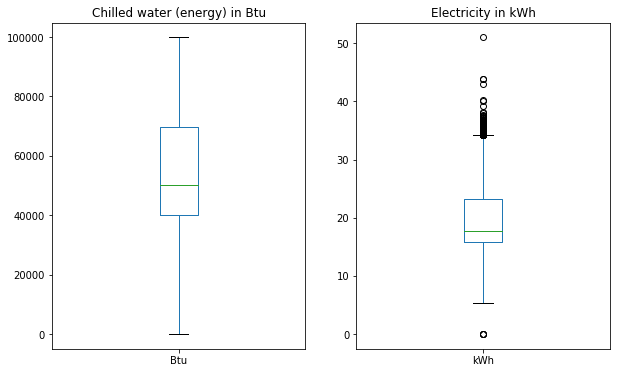

In [130]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

d1['Btu'].plot(ax=axes[0], kind='box')
d1['kWh'].plot(ax=axes[1], kind='box')
axes[0].set_title('Chilled water (energy) in Btu', )
axes[1].set_title('Electricity in kWh')
plt.show()

> Interquartile range (IQR) is the difference between Q3 or 75% and Q1 or 25% that represents the box in the middle. Whiskers are the line extensions for each bottom and top side of 1.5 times of IQR. Those points exceeding the end of both whiskers could be considered to be outliers. We can confirm the data of electricity comparatively has a lower variance while having more outliers. 

## DNC: Begin Part 2

### Part 2: Distributions 

* Your goal is to prepare a side-by-side plot describing the distribution of data from part 1 related to Gerberding Hall.

1) To complete the plot you should assume the data are normally distributed and determine the mean and standard deviation of the chilled water data series.  

2) The left panel of the plot should be a normalized histogram of the chilled water data with an **overlay** of the PDF of the normal distribution based on the $\bar x$ and $s$ values from the data series.  The right panel of the plot should be contain two lines corresponding to the measured CDF and CDF from the normal distribution estimated from the data. 

3) Repeat (2) for the electricity water 

4) Comment in a Markdown cell on the ability of a normal distribution to describe this data 


> Let's make a function to plot the four different graphs. 

In [275]:
def normal_p(x, mu, sigma):
    coef = math.pow(2*math.pi*math.pow(sigma, 2), -0.5)
    probability = coef*math.exp(-math.pow(x-mu, 2)/(2*math.pow(sigma, 2)))
    return probability


def dra_plt(dat):

    y1 = [normal_p(x, dat.mean(), dat.std()) for x in np.linspace(min(dat), max(dat), 100)]

    hist_data, bin_edges = np.histogram(dat, bins=100, density=True)
    cdf_bins = np.cumsum(hist_data * np.diff(bin_edges))
    cdf_bins = np.insert(cdf_bins, 0, 0)
    cdf = scipy.interpolate.interp1d(bin_edges, cdf_bins)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

    x = np.linspace(min(dat), max(dat), 100)
    y_cdf = scipy.stats.norm.cdf(x, dat.mean(), dat.std()) 

    axes[0].hist(dat, bins = 10, normed=True,label='histogram')
    axes[0].plot(x, y1,label='normal pdf')
    axes[0].legend()

    axes[1].plot(x, cdf(x),label='cdf from the histogram')
    axes[1].plot(x, y_cdf,label='cdf from the normal distribution')
    axes[1].legend()

> Although the data, water energy in Btu is not smooth, it shows a little bit of normality trend as verified in the below graphs of `histogram`, `normal pdf`, `cdf from the histogram`, and `cdf from the normal pdf`. 

C:\Users\Yohan_Min\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


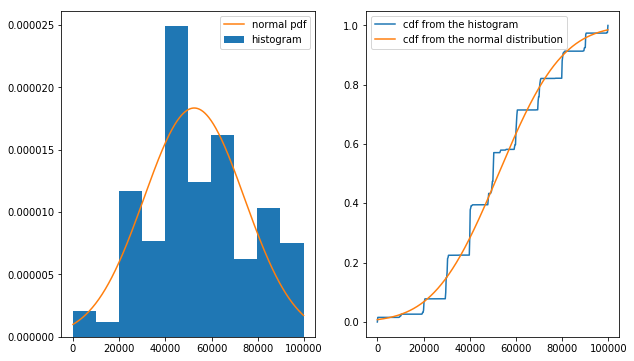

In [276]:
dra_plt(d1['Btu'])

> On the other hand, the other data, electricity consumption in kWh, shows a bit variable trend in terms of interval as indicated in the two graphs below. It may explain why this data has more `outliers` which may distort the line of `CDF` compared to the `normal CDF`. 

C:\Users\Yohan_Min\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


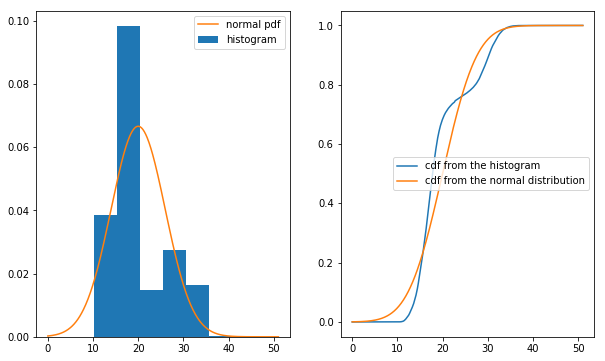

In [277]:
dra_plt(d1['kWh'])

## DNC: Begin Part 3

### Part 3: Hypothesis testing 

The file energyuse.csv contains energy use data for 6 UW students. The data include electricity for lighting, all other electricity use and total electricity use. The final entry in the data file is the national average of the same values. 

Please do the following

1) Formulate a statistical hypothesis to test about the three data sets and clearly state it  
2) Perform a test a significance level of P=0.05 (_make sure to clearly comment your work so I can follow what you are doing_)  
3) Clearly state the meaning of the results in plain language 

> Let's take a look at the data with the summary table.

In [252]:
d2 = pd.read_csv('energyuse.csv')
d2.iloc[:,0:4]
print(d2.iloc[6,:])
d3 = d2.iloc[:6,:]
d3.describe()

Group          National Avg
Lighting               1.76
Electricity            1.28
Total                  3.04
Name: 6, dtype: object


,Lighting,Electricity,Total
count,6.000000,6.000000,6.000000
mean,1.086667,1.276667,2.363333
std,0.746522,0.492119,0.487082
min,0.410000,0.634000,1.721000
25%,0.515250,0.861250,2.088750
50%,0.870500,1.449500,2.288000
75%,1.459000,1.632000,2.686000
max,2.317000,1.769000,3.042000


> First, let's see these three groups (`lighting`, `electricity`, and `total`) are different from their repective national averages by `t-test` with the degree of freedome, `5`. Let's see the significance level of P=0.05 to distinguish if the group is significantly different from the national average. 

In [239]:
for i in range(3):
    [t, p] = scipy.stats.ttest_1samp(d2.iloc[:,i+1], d2.iloc[6,i+1])
    print(p)

0.08057948993769382
0.9871204249316541
0.02427050341769103


> It turns out `lighting` and `electricity` are considered to have the same population parameter with the national average while `total` is significantly different from the national average with `0.05 p-value`. Let's conclude with the 0.05 significant level, the `total` group is different from the national average. 

> Now let's compare the two groups `lighting` and `electricity` if they are from the same mean parameter assuming they are indipendent groups (i.e., they are `not paired`). The test shows they are not significantly different each other in terms of mean.

In [257]:
[t, p] = scipy.stats.ttest_ind(d3.iloc[:,1], d3.iloc[:,2])
print(p)

0.6140388776564885


> But as we know, the two groups are in fact, from the same persons. Let's now try the `paired t-test` to see if the difference between the conditions (i.e., `lighting` and `electricity`) are significantly different from `zero` with the significance level of 0.05. Below with the 0.706 shows that they are not significantly different from `zero` meaning that there is no difference. 

In [258]:
[t, p] = scipy.stats.ttest_rel(d3.iloc[:,1], d3.iloc[:,2])
print(p)

0.7064506323218149
